# System Design Basics

Before designing large system, there are three things we should consider aforehead:

1. What are the different architectural pieces that can be used?
2. How do these pieces work with each other.
3. How can we best utilize these pieces, and consider what are the right tradeoffs?

# Key Characters of Distributed Systems

The key characters of distributed systems include Scalability, Reliability, Availability, Efficiency, and Manageability.

1. Scalability
2. Reliability
3. Availability
4. Efficiency
5. Manageability

## Scalability

Scalability is the capability of a system, process, or a network to handle growing demand.

Because system is not fixed in its lifetime, somtimes it requires to scale up according to **increased data volume or amount of work (e.g. transactions)**. A scalable system would be able to achieve this scaling without performance loss.

### Performance Degradation

The performance of a system designed to be scalable, but in fact it declines with the system size due to the **management or environment cost**.

- Network: network speed may become solwer due to the distance between servers.
- Task: some tasks may not be able to perform simultaneously due to its inherent atomic nature or the flaw in the system design.

### Horizontal vs. Vertical Scaling

Horizontal scaling means the pool of resources, which can be multiple servers while Vertical scaling means to scale up the resources to an existing server.

In distributed system, horizontal scaling is often easier than vertical scaling because it can add extra servers dynamically without disturbing the existsing system. And vertical scaling is largely limited to the capacity of a single server, which often involves downtime and its upper limit.

- Example:
    - Horizontal Scaling
        1. Cassandra
        2. MongoDB
    - Vertical Scaling
        1. MySQL
        
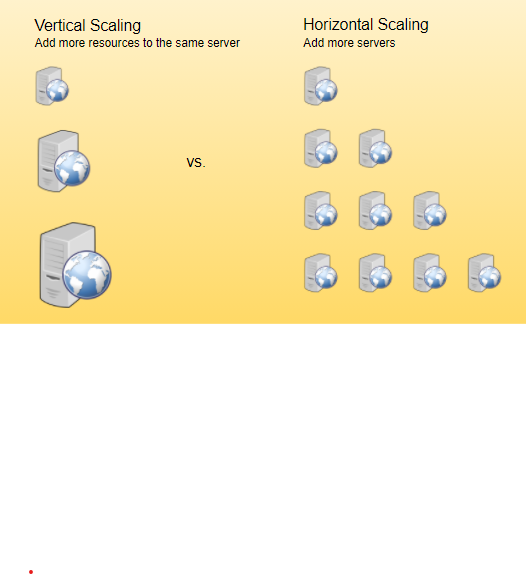

## Reliability

The definition of reliability is the probability a system will fail in a given period. In other words, **a distributed system is considered reliable if it keeps serving its services even when some of its software/hardware components fail**. A reliable system should be able to replace any failing machine with another healthy one.

### Example

For instance, Amazon's primary requirement is that any user transaction should never be canceled due to a failure of the machine that is running that transaction. A reliable distributed system achieves this through redundancy of both the software components and data. **Don't put everything in one place.**

## Availability

The definition of availability is the time a system remains operational to perform its service in a specific period. Availability takes into account maintainability, repair time, spares availability, and other logistics considerations.

Reliability is availability over time considering the full range of possible real-world conditions that can occur.

### Reliability vs. Availability

**If a system is reliable, then it is available.**

**However, if it is available, it is not necessarily reliable.**

## E